## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#printmouse_metadata;study_results
#mouse_metadata.head()
#mouse_metadata['Mouse ID'].count #249
#study_results.head()
#study_results['Mouse ID'].count #1893

# Combine the data into a single dataset
merged=pd.merge(mouse_metadata,study_results,how='inner', on='Mouse ID')
# Display the data table for preview
merged.head()
 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
M_count=merged['Mouse ID'].nunique()
M_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#df=data origin.form to readdata.[{( dataorigin.what to look for.[{( where to look, criteria.tipo
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
#duplicatemtp=merged.?????forma??[merged.duplicated(["Mouse ID","Timepoint"])],??criteria??.nunique() not sure if nunique
#nunique gives me the count... 1 i need to get the name thus nunique...but the way that shoes me the info is: array(['g989'], dtype=object), thus [0] im asking for first position on my []
duplicatemtp=merged.loc[merged.duplicated(["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicatemtp[0]

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicatemtp()
#still thinking about this how?


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#df[(df['Train'] != 'DeutscheBahn') & (df['Train'] != 'SNCF')], how to use this?
#got this from https://stackoverflow.com/questions/34397982/pandas-dataframe-access-multiple-items-with-not-equal-to/34398006
#cleanmerged=merged.loc[merged["Mouse ID"]]?? path? = df['Train']
#!= 'DeutscheBahn') = != 'g989'????
#& (df['Train'] != 'SNCF')] = ????? do i need this part? 
cleanmerged=merged.loc[merged["Mouse ID"]!= 'g989']
#should have 248 after taking g989 out

In [9]:
# Checking the number of mice in the clean DataFrame.
M_count2=cleanmerged['Mouse ID'].nunique() #missing something 
M_count2 # keep missing this part for display

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Drougregimen=cleanmerged.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
SummaryTV=pd.DataFrame({"Mean":Drougregimen['Tumor Volume (mm3)'].mean(),
                       "Median":Drougregimen['Tumor Volume (mm3)'].median(),
                       "Variance":Drougregimen['Tumor Volume (mm3)'].var(),
                       "Stddev":Drougregimen['Tumor Volume (mm3)'].std(),
                       "Sem":Drougregimen['Tumor Volume (mm3)'].sem()})
SummaryTV.style.format({'Mean': "{:.3f}",'Median': "{:.3f}",'Variance': "{:.3f}",'Stddev': "{:.3f}",'Sem': "{:.3f}"})
#pandasHW Summary.style.format({'average price': "${:.2f}",'total revenue': "${:,.2f}"})

,Mean,Median,Variance,Stddev,Sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
SummaryTV2=cleanmerged.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
SummaryTV2.style.format({'mean':"{:.3f}",'median':"{:.3f}",'var':"{:.3f}",'std':"{:.3f}",'sem':"{:.3f}"})
#formatting not working

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

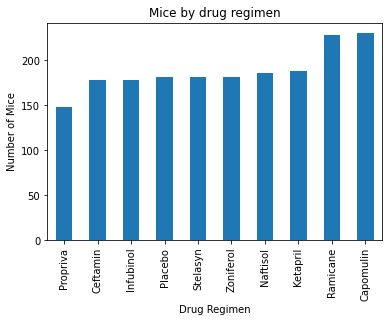

In [40]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
Drougregimen=cleanmerged.groupby('Drug Regimen')
miceregimem=Drougregimen["Mouse ID"].count().sort_values(ascending=True)
regimenchart=miceregimem.plot(kind="bar",title="Mice by drug regimen")
regimenchart.set_xlabel("Drug Regimen")
regimenchart.set_ylabel("Number of Mice")

In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
